In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, data):
        # Center the data by subtracting the mean
        num_images, num_pixels = data.shape
        self.mean = np.mean(data, axis=0)
        centered_data = data - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(centered_data, rowvar=False)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]  # This line calculates the indices that would sort the eigenvalues in ascending order and then reverses the order
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = self.eigenvectors[:, :self.n_components]

    def compress(self, data):
        centered_data = data - self.mean
        compressed_data = np.dot(centered_data, self.components)
        return compressed_data

    def decompress(self, compressed_data):
        decompressed_data = np.dot(compressed_data, self.components.T) + self.mean
        return decompressed_data

In [ ]:
test_image_1 = Image.open('/content/The First Touch.png')
new_size = (700, 700)
test_image_1 = test_image_1.resize(new_size)

# Converting the resized image to grayscale
grayscale_image = test_image_1.convert('L')

# Convert the grayscale image to a NumPy array
grayscale_image = np.array(grayscale_image)
grayscale_image.shape

(700, 700)

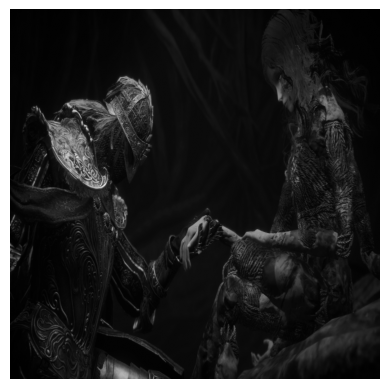

In [ ]:
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# determine the number of components(largest eigenvectors)
n_components = 50
pca_1 = PCA(n_components)
pca_1.fit(grayscale_image)
compressed_image_1 = pca_1.compress(grayscale_image)

compressed_image_1.shape

(700, 50)

In [ ]:
decompressed_image_1 = pca_1.decompress(compressed_image_1)
decompressed_image_1.shape

(700, 700)

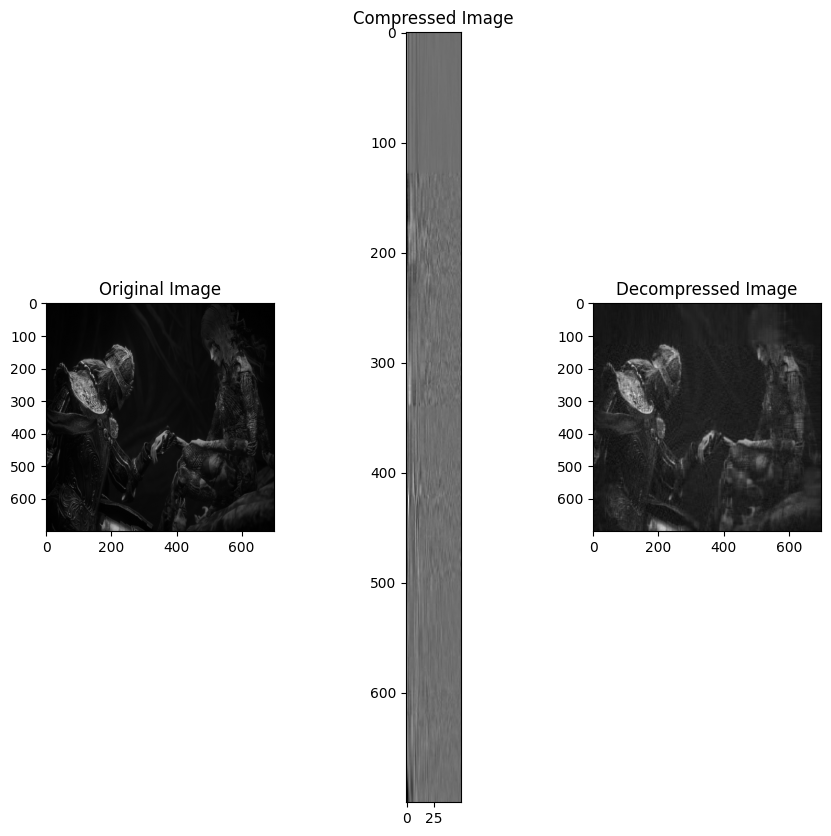

In [ ]:

plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(grayscale_image, cmap='gray')


plt.subplot(132)
plt.title("Compressed Image")
plt.imshow(compressed_image_1, cmap='gray')

plt.subplot(133)
plt.title("Decompressed Image")
plt.imshow(decompressed_image_1, cmap='gray')

In [ ]:

test_image = Image.open('/content/The First Touch.png')
new_size = (300, 300)

image = test_image.resize(new_size)

image = np.array(image)

image.shape

(300, 300, 4)

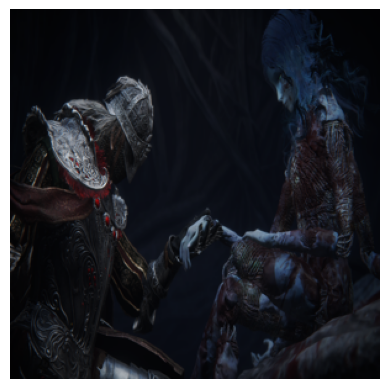

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Separate the RGB channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

In [ ]:
# Apply PCA to each channel
n_components = 35

pca_red = PCA(n_components)
pca_green = PCA(n_components)
pca_blue = PCA(n_components)

In [ ]:
pca_red.fit(red_channel)
pca_green.fit(green_channel)
pca_blue.fit(blue_channel)

In [ ]:
# Compress each channel
compressed_red = pca_red.compress(red_channel)
compressed_green = pca_green.compress(green_channel)
compressed_blue = pca_blue.compress(blue_channel)

In [ ]:

compressed_image_2 = np.stack((compressed_red, compressed_green, compressed_blue), axis=-1)

In [ ]:
# Decompress each channel
decompressed_red = pca_red.decompress(compressed_red)
decompressed_green = pca_green.decompress(compressed_green)
decompressed_blue = pca_blue.decompress(compressed_blue)

In [ ]:

reconstructed_image = np.stack((decompressed_red, decompressed_green, decompressed_blue), axis=-1)

# # Convert the reconstructed image to uint8 data type
reconstructed_image = reconstructed_image.astype(np.uint8)

reconstructed_image.shape

(300, 300, 3)

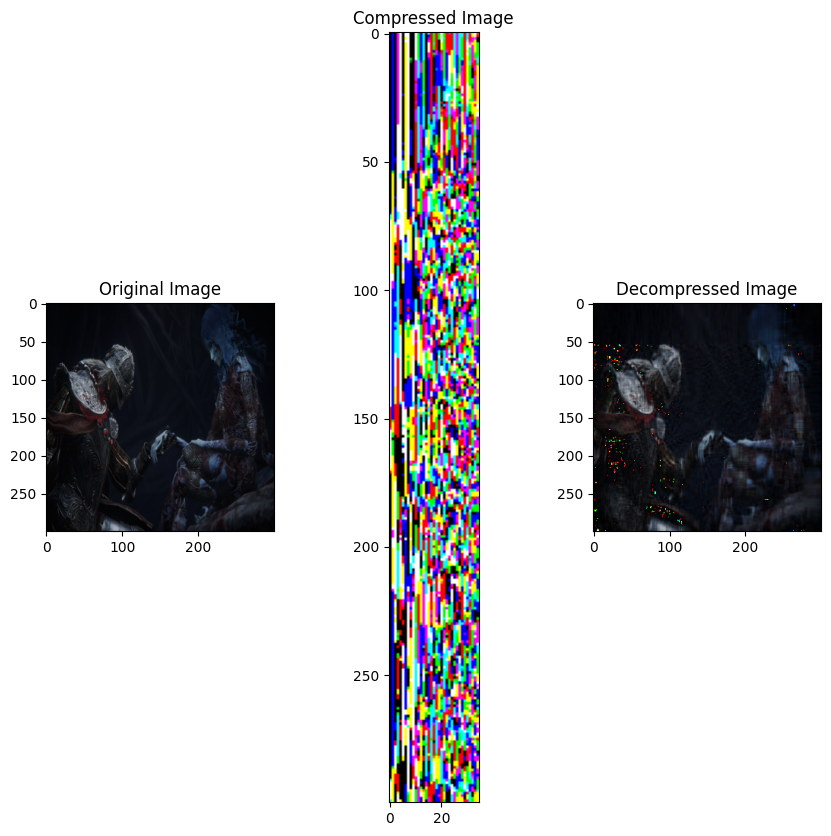

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(132)
plt.title("Compressed Image")
plt.imshow(compressed_image_2)


# Decompressed Image
plt.subplot(133)
plt.title("Decompressed Image")
plt.imshow(reconstructed_image)

In [ ]:
import sys

# Function to calculate size in MB
def calculate_size_in_mb(image):
    size_in_bytes = sys.getsizeof(image)
    size_in_mb = size_in_bytes / (1024 * 1024)  # Convert bytes to MB
    return size_in_mb

# Print sizes of the images
print(f"Original Image Size: {calculate_size_in_mb(image):.2f} MB")
print(f"Compressed Image Size: {calculate_size_in_mb(compressed_image_2):.2f} MB")
print(f"Decompressed Image Size: {calculate_size_in_mb(reconstructed_image):.2f} MB")


Original Image Size: 0.34 MB
Compressed Image Size: 0.24 MB
Decompressed Image Size: 0.26 MB
